<a href="https://colab.research.google.com/github/cartman12/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Mohamad%20Ali%20Nasser%20-%20DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
cell_phones.shape

(9215, 3)

In [3]:
population.shape

(59297, 3)

In [4]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [5]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
# inner is default, not necessary to on : 'geo' and 'time' as they have the same intersect.
df1 = cell_phones.merge(population)

In [11]:
df1.shape

(8590, 4)

In [27]:
df1.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [14]:
geo_country_codes.shape

(273, 33)

In [15]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
# Select geo and country frin geo_country_codes and merge on geo because they have the same name
df2 = pd.merge(df1, geo_country_codes[['geo','country']], how = 'inner', on = 'geo')

In [32]:
df2.shape

(8590, 5)

In [34]:
df2.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

In [0]:
# Will add is in UN and region
df3 = pd.merge(df2, geo_country_codes[['geo','un_state','world_6region']], on = 'geo')

In [45]:
df3.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region
0,afg,1960,0.0,8996351,Afghanistan,True,south_asia
1,afg,1965,0.0,9938414,Afghanistan,True,south_asia
2,afg,1970,0.0,11126123,Afghanistan,True,south_asia
3,afg,1975,0.0,12590286,Afghanistan,True,south_asia
4,afg,1976,0.0,12840299,Afghanistan,True,south_asia


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
# n_c_pp = number of cell phones per person - Add a column
df3['n_c_pp'] =  df['cell_phones_total'] / df['population_total']

In [47]:
df3.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp
0,afg,1960,0.0,8996351,Afghanistan,True,south_asia,0.0
1,afg,1965,0.0,9938414,Afghanistan,True,south_asia,0.0
2,afg,1970,0.0,11126123,Afghanistan,True,south_asia,0.0
3,afg,1975,0.0,12590286,Afghanistan,True,south_asia,0.0
4,afg,1976,0.0,12840299,Afghanistan,True,south_asia,0.0


In [48]:
# new DF with condition United States
# Use isin, to only select a specific value from the dataframe

usa = df3[df3['country'] == 'United States']
usa[usa['time'].isin([2017])]

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp
8134,usa,2017,395881000.0,324459463,United States,True,america,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df3['geo'] = df3['geo'].str.upper()

In [50]:
df3.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp
0,AFG,1960,0.0,8996351,Afghanistan,True,south_asia,0.0
1,AFG,1965,0.0,9938414,Afghanistan,True,south_asia,0.0
2,AFG,1970,0.0,11126123,Afghanistan,True,south_asia,0.0
3,AFG,1975,0.0,12590286,Afghanistan,True,south_asia,0.0
4,AFG,1976,0.0,12840299,Afghanistan,True,south_asia,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

In [0]:
# True or false, did they have a cellphone working at a particular year

df3['did_have_cp?'] =  df['cell_phones_total'] != 0

In [54]:
df3.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp,did_have_cp?
0,AFG,1960,0.0,8996351,Afghanistan,True,south_asia,0.0,False
1,AFG,1965,0.0,9938414,Afghanistan,True,south_asia,0.0,False
2,AFG,1970,0.0,11126123,Afghanistan,True,south_asia,0.0,False
3,AFG,1975,0.0,12590286,Afghanistan,True,south_asia,0.0,False
4,AFG,1976,0.0,12840299,Afghanistan,True,south_asia,0.0,False


In [57]:
# Canada in the year 1980
canada = df3[df3['country'] == 'Canada']
canada[canada['time'].isin([1980])]

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp,did_have_cp?
1321,CAN,1980,0.0,24537422,Canada,True,america,0.0,False


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
import numpy as np

In [60]:
df3.describe()

,time,cell_phones_total,population_total,n_c_pp
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [62]:
df3.describe(exclude = np.number)

,geo,country,un_state,world_6region,did_have_cp?
count,8590,8590,8590,8590,8590
unique,195,195,2,6,2
top,HND,Portugal,True,europe_central_asia,True
freq,46,46,8544,2324,4835


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
y2017 = df3[df3['time'] == 2017]

In [0]:
y2017

In [0]:
top5 = pd.DataFrame(y2017.sort_values(by = 'cell_phones_total', ascending = False).head(5))

In [95]:
top5

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp,did_have_cp?
1496,CHN,2017,1.474097e+09,1409517397,China,True,east_asia_pacific,1.045817,True
3595,IND,2017,1.168902e+09,1339180127,India,True,south_asia,0.872849,True
3549,IDN,2017,4.589232e+08,263991379,Indonesia,True,east_asia_pacific,1.738402,True
8134,USA,2017,3.958810e+08,324459463,United States,True,america,1.220125,True
1084,BRA,2017,2.364885e+08,209288278,Brazil,True,america,1.129966,True


In [0]:
 # This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
top5['cell_phones_total'] = top5.apply(lambda x: "{:,}".format(x['cell_phones_total']), axis=1)

In [97]:
top5.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp,did_have_cp?
1496,CHN,2017,"1,474,097,000.0",1409517397,China,True,east_asia_pacific,1.045817,True
3595,IND,2017,"1,168,902,277.0",1339180127,India,True,south_asia,0.872849,True
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,True,east_asia_pacific,1.738402,True
8134,USA,2017,"395,881,000.0",324459463,United States,True,america,1.220125,True
1084,BRA,2017,"236,488,548.0",209288278,Brazil,True,america,1.129966,True


In [0]:
df3

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
df3['more_c_p'] = df3['n_c_pp'] > 1

In [0]:
more_c_p = df3[df3['more_c_p'] == True]

In [0]:
us = more_c_p[more_c_p['country'] == 'United States']

In [0]:
y_us_more_c_p = us.sort_values(by = 'cell_phones_total', ascending = True).head(1)['time']

In [127]:
y_us_more_c_p

8131    2014
Name: time, dtype: int64

In [0]:
# Year 2014

In [107]:
df3.head()

,geo,time,cell_phones_total,population_total,country,un_state,world_6region,n_c_pp,did_have_cp?,more_c_p
0,AFG,1960,0.0,8996351,Afghanistan,True,south_asia,0.0,False,False
1,AFG,1965,0.0,9938414,Afghanistan,True,south_asia,0.0,False,False
2,AFG,1970,0.0,11126123,Afghanistan,True,south_asia,0.0,False,False
3,AFG,1975,0.0,12590286,Afghanistan,True,south_asia,0.0,False,False
4,AFG,1976,0.0,12840299,Afghanistan,True,south_asia,0.0,False,False


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
help(pd.pivot_table)
pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.

In [0]:
df3.iscountry = df3[df3['country'].isin(['China', 'India', 'United States', 'Indonesia', 'Brazil'])]

In [0]:
df3.iscountry

In [0]:
df3_piv = pd.pivot_table(df3.iscountry, values = ['cell_phones_total'], columns = 'time')

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [276]:
df.head()

,year,g_occupation,show,group,guest,occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
df.columns = map(str.lower, df.columns)

In [0]:
df = df.rename(columns = {'GoogleKnowlege_Occupation' : 'g_occupation'})

In [0]:
# We will use group column.

In [0]:
percentage_by_group1999

In [0]:
# tried to dot it in a fucntion no TIME!!!!!! rabbit hole
def percentage_by_group(x):
  percentage_by_group2 = pd.DataFrame()
  for i in range(1999,2016):
    y = x[x['year'] == i]
    percentage_by_group1 = pd.DataFrame(y['group'].value_counts(normalize = True)*100)
    percentage_by_group2 = percentage_by_group1.merge(percentage_by_group2, left_index=True, right_index=True , how='outer')   
  return percentage_by_group2

In [0]:
print(percentage_by_group(df))

In [0]:
y1999 = df[df['year'] == 1999]
percentage_by_group1999 = pd.DataFrame(y1999['group'].value_counts(normalize = True)*100)
percentage_by_group1999 = percentage_by_group1999.rename( columns = {'group' : 'Percentage'})
percentage_by_group1999

In [0]:
# y2000 = df[df['year'] == 2000]
# percentage_by_group2000 = pd.DataFrame(y2000['group'].value_counts(normalize = True)*100)
# percentage_by_group2000 = percentage_by_group2000.rename( columns = {'group' : 'Percentage'})
# percentage_by_group2000

In [0]:
# y2001 = df[df['year'] == 2001]
# percentage_by_group2001 = pd.DataFrame(y2001['group'].value_counts(normalize = True)*100)
# percentage_by_group2001 = percentage_by_group2001.rename( columns = {'group' : 'Percentage'})
# percentage_by_group2001

In [0]:
ct = pd.crosstab(df["year"], df['occupation']) 

In [278]:
ct.head()

occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
year,,,,
1999,150,2,11,3
2000,125,14,21,9
2001,114,6,31,6
2002,99,11,42,7
2003,93,17,41,15


In [304]:
ct['total'] = ct.sum(axis=1)
ct.head()

occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,total
year,,,,,
1999,150,2,11,3,166
2000,125,14,21,9,169
2001,114,6,31,6,157
2002,99,11,42,7,159
2003,93,17,41,15,166


In [0]:
ct = ct.loc[:,'Academic':'media'].div(ct["total"], axis=0)*100

In [301]:
ct.head()

occupation,year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,90.361446,1.204819,6.626506,1.807229
1,2000,73.964497,8.284024,12.426036,5.325444
2,2001,72.611465,3.821656,19.745223,3.821656
3,2002,62.264151,6.918239,26.415094,4.402516
4,2003,56.024096,10.240964,24.698795,9.036145


In [306]:
ct.reset_index(level=0, inplace=True)
ct

occupation,year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,90.361446,1.204819,6.626506,1.807229
1,2000,73.964497,8.284024,12.426036,5.325444
2,2001,72.611465,3.821656,19.745223,3.821656
3,2002,62.264151,6.918239,26.415094,4.402516
4,2003,56.024096,10.240964,24.698795,9.036145
5,2004,38.414634,22.560976,27.439024,11.585366
6,2005,37.037037,16.049383,33.333333,13.580247
7,2006,36.024845,19.254658,29.192547,15.527950
8,2007,25.531915,17.021277,33.333333,24.113475
9,2008,20.731707,20.121951,46.951220,12.195122


### Part 2 — Recreate this explanatory visualization:

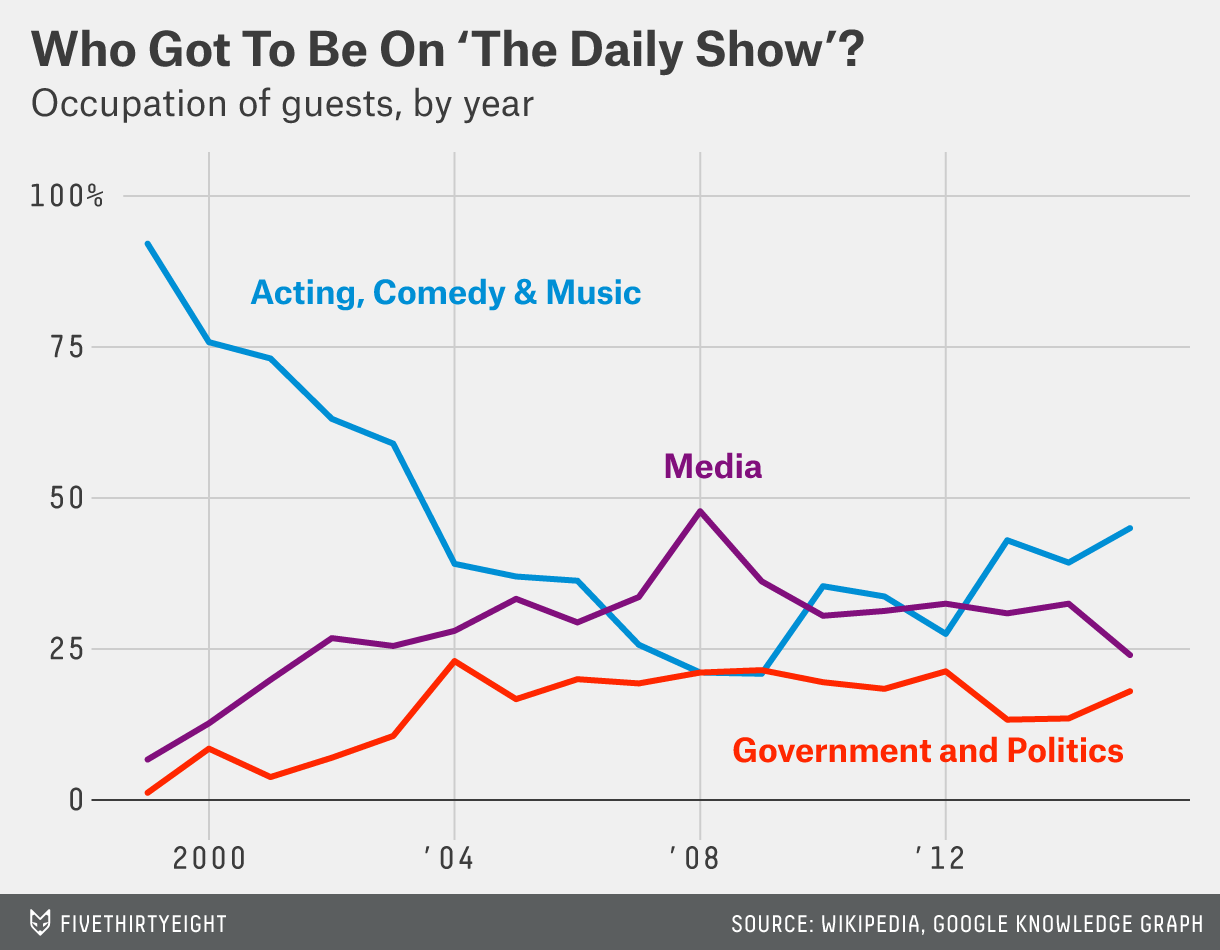

In [283]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
occupation = list(ct.drop(columns=['Other', 'year']).columns.values) 

Text(2007.4, 53, 'Media')

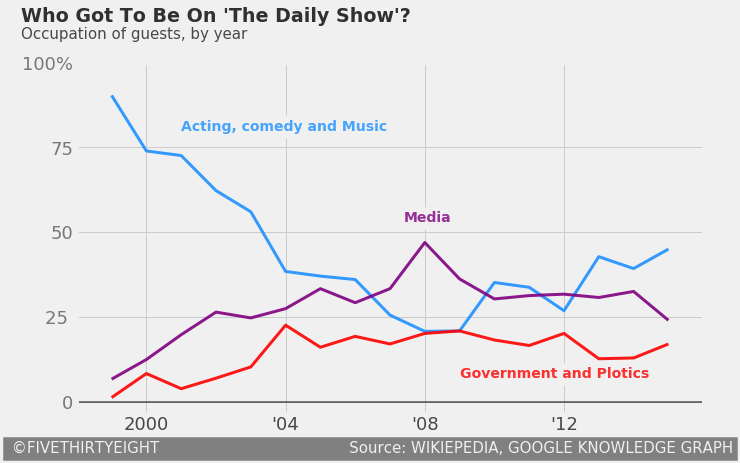

In [375]:
# Setting the style from matplotlib to '538'
plt.style.use('fivethirtyeight')

# List a list of colors
colors = ['dodgerblue','red','purple']

# Plot and define - y is from the list of majores under 20% in 1970 - color is taken from the list of colors.
ax = ct.plot(x = 'year', y = occupation, figsize = (10,6), color = colors, legend= False, alpha = 0.9, linewidth = 3)

# Set the size of the number of values and the x and y ticks
ax.tick_params(axis = 'both', labelsize = 18)

# Set the y labels, although the y lables are set automatically we have edited in a string format so that we can the % and added space after the numbers so that they are aligned. the number 10 is to set the difference between each label
plt.yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels = ['0','25 ', '50', '75', '100%'], alpha =0.5)

plt.xticks([2000, 2004,2008, 2012])
ax.set_xticklabels(labels = [ '2000',"'04", "'08","'12"], alpha = 0.7);


# Set a black horizontal line, set it on the x axis (y=0) make it bold
ax.axhline(y = 0, color = 'black',linewidth = 2, alpha = 0.5)

# Add limit of x axis so that we can add the small ticks on the y axis
ax.set_xlim(left = 1998, right = 2016)

# Remove the X label (year)
ax.xaxis.label.set_visible(False)

# Add text:

# Add the signature mark, set the x and y, background color and font color.

ax.text(x = 1996, y = -15.1, s = ' ©FIVETHIRTYEIGHT                                        Source: WIKIEPEDIA, GOOGLE KNOWLEDGE GRAPH', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')

# # Title
ax.text(x = 1996.4, y = 112, s = "Who Got To Be On 'The Daily Show'?", fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
ax.text(x = 1996.4, y = 107, s = 'Occupation of guests, by year', fontsize = 15, color= 'black', alpha = 0.7)

# We remove the legend and add these texts to the lines, we add them based on where we want thme to be by defining their x and y, and rotation. colors is indexed from the colors list. Before we turn the legend  - False we make sure they are correct.
# and we use rotation to play with the text's alignment
ax.text(x = 2001, y = 80, s = 'Acting, comedy and Music', color = colors[0], weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax.text(x = 2009, y = 7, s = 'Government and Plotics', color = colors[1], weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax.text(x = 2007.4, y = 53, s = 'Media', color = colors[2], weight = 'bold',
              backgroundcolor = '#f0f0f0', alpha = 0.8)


**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)